In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import hmf
import fkplotlib

fkplotlib.use_txfonts()

In [2]:
omega_ms = np.arange(0.2, 0.42, 0.05)
sigma_8s = np.arange(0.7, 0.92, 0.05)

mf = hmf.MassFunction(Mmin=13.5, Mmax=15.5, dlog10m=0.1)
mf.sigma_8 = 0.8

hmfs_omega_ms, hmfs_sigma_8s = [], []
for omega_m in omega_ms:
    mf.update(cosmo_params={"Om0": omega_m}, z=0.5)
    hmfs_omega_ms.append((mf.m, mf.dndm))
mf.update(cosmo_params={"Om0": 0.3}, z=0.5)
for sigma_8 in sigma_8s:
    mf.sigma_8 = sigma_8
    hmfs_sigma_8s.append((mf.m, mf.dndm))

<IPython.core.display.Javascript object>


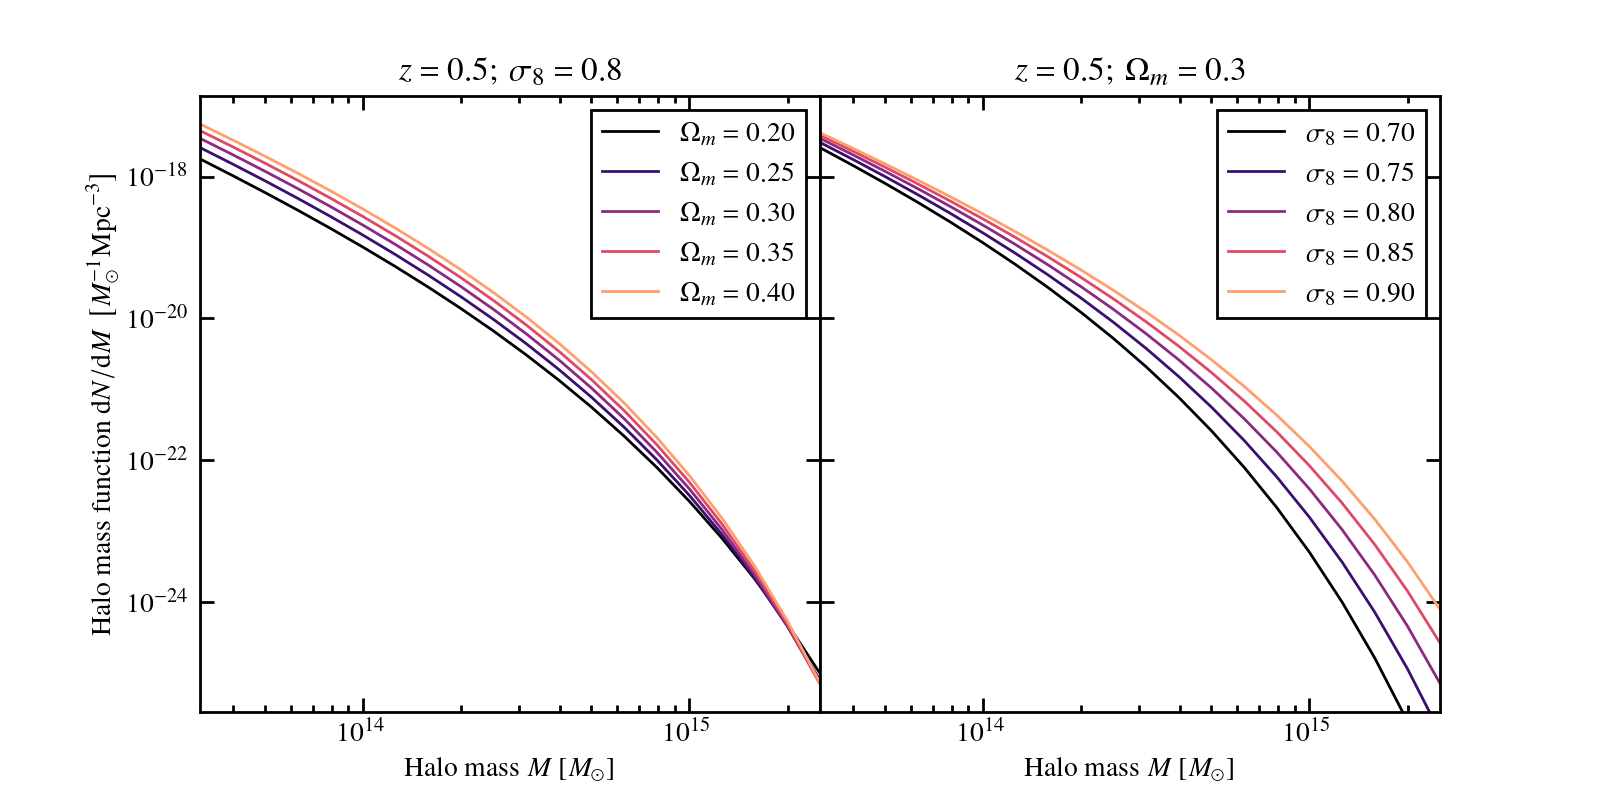

In [9]:
cmap = plt.cm.magma
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

for i, (omega_m, _hmf) in enumerate(zip(omega_ms, hmfs_omega_ms)):
    axs[0].plot(_hmf[0], _hmf[1], color=cmap(i / len(omega_ms)), label=f"$\Omega_m = {omega_m:.2f}$")
for i, (sigma_8, _hmf) in enumerate(zip(sigma_8s, hmfs_sigma_8s)):
    axs[1].plot(_hmf[0], _hmf[1], color=cmap(i / len(sigma_8s)), label=f"$\sigma_8 = {sigma_8:.2f}$")
    
for ax in axs:
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim(mf.m.min(), mf.m.max())
    ax.set_ylim(*(axs[0].get_ylim()))
    fkplotlib.ax_legend(ax, loc=0)
    fkplotlib.ax_bothticks(ax)
    ax.set_xlabel(r"Halo mass $M \;[M_\odot]$")
axs[0].set_title("$z = 0.5 ; \; \sigma_8 = 0.8$")
axs[1].set_title("$z = 0.5 ; \; \Omega_m = 0.3$")
axs[0].set_ylabel(r"Halo mass function ${\rm d}N / {\rm d}M \;\; \big[M_\odot^{-1} {\rm Mpc}^{-3} \big]$") # also h^4
axs[1].set_yticklabels([])
fig.subplots_adjust(wspace=0)

In [10]:
fig.savefig("hmf_cosmo.pdf")